In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


In [154]:
data1 = pd.read_csv("1.csv")
data2 = pd.read_csv("2.csv")
data3 = pd.read_csv("3.csv")
data4 = pd.read_csv("4.csv")
data5 = pd.read_csv("5.csv")
data6 = pd.read_csv("6.csv")
data7 = pd.read_csv("7.csv")
data8 = pd.read_csv("8.csv")
data9 = pd.read_csv("9.csv")
data10 = pd.read_csv("10.csv")
data11 = pd.read_csv("11.csv")
data12 = pd.read_csv("12.csv")
data13 = pd.read_csv("13.csv")
#data14 = pd.read_csv("14.csv")

data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13])
#data = data[(data.max_temp != 0) | (data.min_temp != 0)|(data.avg_temp != 0)]


In [174]:
#print(data.dtypes)
#data['datetime'] = pd.to_datetime(data['datetime'])
print(data.dtypes)

start_time                 object
end_time                   object
tripduration                int64
from_station_id             int64
to_station_id               int64
usertype                    int64
gender                      int64
birthyear                 float64
distance                    int64
datetime           datetime64[ns]
month_rel                   int64
day_rel                     int64
hr_rel                      int64
max_temp                    int64
min_temp                    int64
avg_temp                    int64
dtype: object


In [156]:
data.to_csv("complete_processed_data.csv", sep=',')

In [157]:
#data = data.drop('Unnamed',axis=1)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
#print(data.head(5))
data = data.sort_values(by='datetime')
#print(data.head(5))


In [158]:
# Pie Plot based on gender
counts_by_gender = data.gender.value_counts()
#women = data[data.gender == 0].sum()
labels = 'Male' , 'Female'
colors = ['yellow', 'red',]
explode = (0, 0.1)
sizes = [counts_by_gender[1],counts_by_gender[0]]

([<matplotlib.patches.Wedge at 0x1b7fda70860>,
  <matplotlib.text.Text at 0x1b7fd82d4e0>])

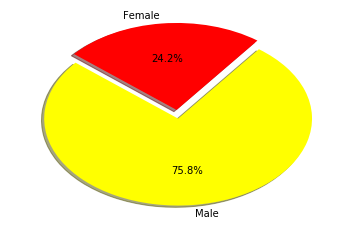

In [159]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
#plt.axis('equal')

In [160]:
counts_by_hour = data.hr_rel.value_counts()
print(counts_by_hour.sort_index(inplace=True))

None


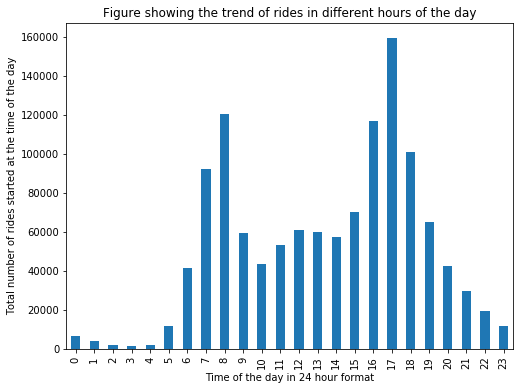

In [161]:
ax = counts_by_hour.plot(figsize=(8,6),kind='bar',title="Figure showing the trend of rides in different hours of the day")
ax.set_xlabel("Time of the day in 24 hour format")
ax.set_ylabel("Total number of rides started at the time of the day")

In [162]:
counts_by_day = data.day_rel.value_counts()
#print(counts_by_day.sort_values(ascending=False))
#print(counts_by_day[5])
days = ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday')
y_pos = np.arange(len(days))
ride_count = [counts_by_day[0],counts_by_day[1],counts_by_day[2],counts_by_day[3],counts_by_day[4],counts_by_day[5],counts_by_day[6]]


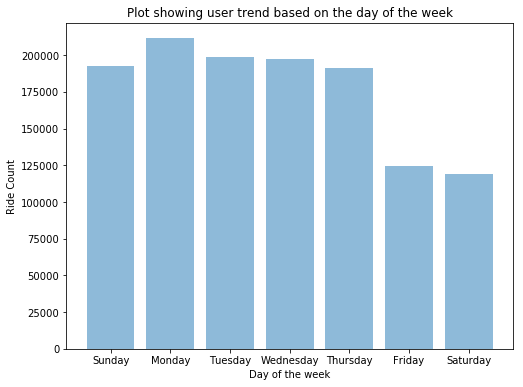

In [163]:
plt.figure(figsize=(8,6))
plt.bar(y_pos, ride_count, align='center', alpha=0.5)
plt.xticks(y_pos, days)
plt.title("Plot showing user trend based on the day of the week")
plt.ylabel('Ride Count')
plt.xlabel('Day of the week')


In [173]:
count_by_temp = data['avg_temp'].value_counts()
count_by_temp = count_by_temp[1:]
# First value is removed because the value was set to a dummy value when no weather data was available
count_by_temp.sort_index(inplace=True)
#count_by_temp

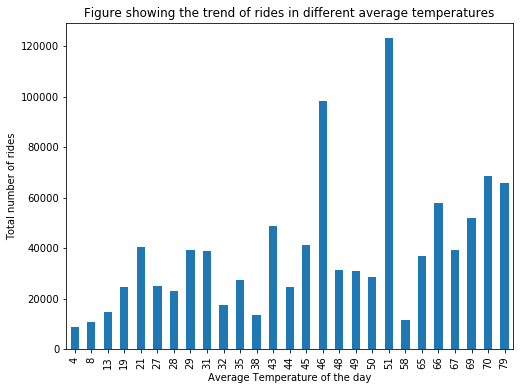

In [165]:

ax = count_by_temp.plot(figsize=(8,6),kind='bar',title="Figure showing the trend of rides in different average temperatures")
ax.set_xlabel("Average Temperature of the day")
ax.set_ylabel("Total number of rides")

In [166]:
men=[]
women=[]
for i in range(1,7):
    men.append(data[(data['datetime'].dt.month==i) & (data['gender']==1)].count()[0])
    women.append(data[(data['datetime'].dt.month==i) & (data['gender']==0)].count()[0])

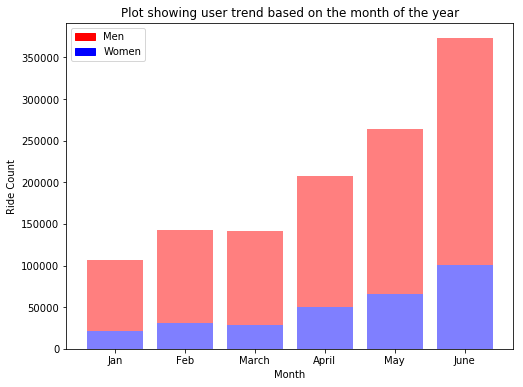

In [168]:
months = ('Jan','Feb','March','April','May','June')
y_pos = np.arange(len(months))
plt.figure(figsize=(8,6))
red_patch = mpatches.Patch(color='r', label='Men')
#plt.legend(handles=[red_patch])
b_patch = mpatches.Patch(color='b', label='Women')
plt.legend(handles=[red_patch,b_patch])
plt.bar(y_pos, men, align='center', alpha=0.5,color = 'red',bottom= women)
plt.bar(y_pos, women, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, months)
plt.title("Plot showing user trend based on the month of the year")
plt.ylabel('Ride Count')
plt.xlabel('Month')

In [169]:
# Pie Plot based on gender
counts_by_distance = data.distance.value_counts()
#women = data[data.gender == 0].sum()



In [170]:
labels = 'Short Trips' , 'Long Trips'
colors = ['yellow', 'red',]
explode = (0, 0.1)
sizes = [counts_by_distance[1],counts_by_distance[0]]

([<matplotlib.patches.Wedge at 0x1b7a5364668>,
  <matplotlib.text.Text at 0x1b7a537a2e8>])

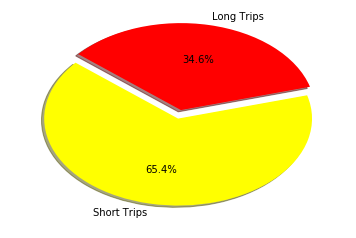

In [171]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)